###Вариант выполнения задания с выводом графиков









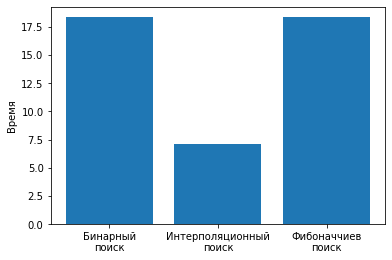

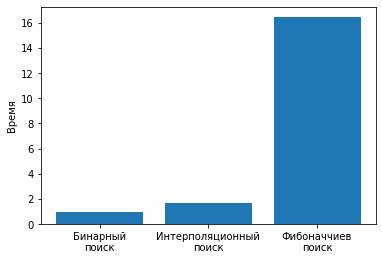

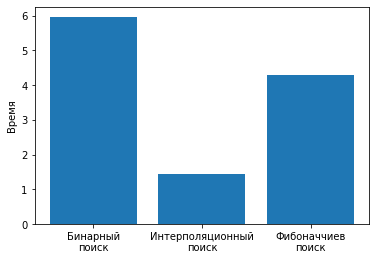

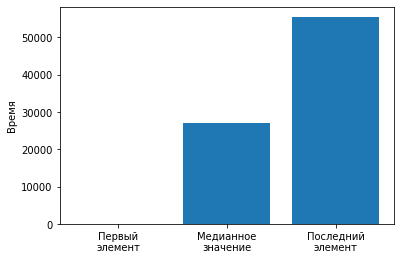

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from time import time

def search_posled(massive, x):
    nX = -1
    for i in range(len(massive)):
        if massive[i]==x:
            nX = i
            break

def search_binar(massive, x):
    mid = len(massive) // 2
    low = 0
    high = len(massive) - 1
 
    while massive[mid] != x and low <= high:
        if x > massive[mid]:
            low = mid + 1
        else:
            high = mid - 1
        mid = (low + high) // 2

def search_intpol(massive, x):
    idx0 = 0
    idxn = (len(massive) - 1)

    while idx0 <= idxn and x >= massive[idx0] and x <= massive[idxn]:
        mid = idx0 + int(((float(idxn - idx0)/(massive[idxn] - massive[idx0])) * (x - massive[idx0])))
        if massive[mid] == x:
            return

        if massive[mid] < x:
            idx0 = mid + 1

def search_fib(massive, x):
    n = len(massive)
    m2, m1 = 0, 1 
    m = m2 + m1 
    while (m < n):
        m2, m1 = m1, m
        m = m2 + m1
    mid = -1;
    while (m > 1):
        i = min(mid+m2, n-1)
        if (massive[i] < x):
            m, m1 = m1, m2
            m2 = m - m1
            mid = i
        elif (massive[i] > x):
            m = m2
            m1 = m1 - m2
            m2 = m - m1
        else:
            return


n = 1000000
massive = []
for j in range(n):
    massive.append(j)

algoritms_name = ["Последовательный\nпоиск", "Бинарный\nпоиск",
                  "Интерполяционный\nпоиск", "Фибоначчиев\nпоиск"]
algoritms_func = [search_posled, search_binar,
                  search_intpol, search_fib]
time_list = np.zeros ((4, 3))
element_ids = [0, int(len(massive) / 2), int(len(massive) - 1)]
for i in range (4):
    func = algoritms_func[i]
    for j, ind in enumerate (element_ids):
        starttime = time()
        func (massive, massive[ind])
        time_list [i][j] = (time() - starttime) * 1000000
  
for i in range (3):
    plt.figure()
    plt.ylabel("Время")
    plt.bar (algoritms_name[1:], time_list[1:,i]) 

plt.figure()
plt.ylabel("Время")
plt.bar (["Первый\nэлемент", "Медианное\nзначение", "Последний\nэлемент"], time_list[0]);

###Вариант выполнения задания с вводом искомого числа

In [32]:
from datetime import datetime

def search_posled(massive, x):
    nX = -1
    for i in range(len(massive)):
        if massive[i]==x:
            nX = i
            break
    if nX != -1:
        print("Нашли под номером",nX)
    else:
        print("Не нашли")

def search_binar(massive, x):
    mid = len(massive) // 2
    low = 0
    high = len(massive) - 1
 
    while massive[mid] != x and low <= high:
        if x > massive[mid]:
            low = mid + 1
        else:
            high = mid - 1
        mid = (low + high) // 2
 
    if low > high:
        print("Не нашли")
    else:
        print("Нашли под номером", mid)

def search_intpol(massive, x):
    idx0 = 0
    idxn = (len(massive) - 1)

    while idx0 <= idxn and x >= massive[idx0] and x <= massive[idxn]:
        mid = idx0 + int(((float(idxn - idx0)/(massive[idxn] - massive[idx0])) * (x - massive[idx0])))
        if massive[mid] == x:
            print ("Нашли под номером", mid)
            return

        if massive[mid] < x:
            idx0 = mid + 1
    print ("Не нашли")

def search_fib(massive, x):
    n = len(massive)
    m2, m1 = 0, 1 
    m = m2 + m1 
    while (m < n):
        m2, m1 = m1, m
        m = m2 + m1
    mid = -1;
    while (m > 1):
        i = min(mid+m2, n-1)
        if (massive[i] < x):
            m, m1 = m1, m2
            m2 = m - m1
            mid = i
        elif (massive[i] > x):
            m = m2
            m1 = m1 - m2
            m2 = m - m1
        else:
            print("Нашли под номером", i)
            return
    if ((m1 != 0) and (n < mid + 1) and (massive[mid+1] == x)):
        print("Нашли под номером", mid+1)
    else:
        print("Не нашли")

try:
    n = int(input('Введите число элементов в массиве (от 1), n = '))
    while (n <= 0):
        n = int(input("По условию n >= 1. Повторите ввод: "))
    x = int(input('Введите искомое число, x = '))

    massive = []
    for j in range(n):
        massive.append(j)

except ValueError:
    print ('Введенные данные некорректны, должно быть целое положительное число ')

starttime = datetime.now().microsecond
print ("Последовательный поиск:")
search_posled(massive, x)
print ("Затраченное время = ", datetime.now().microsecond - starttime, "мкс")
starttime = datetime.now().microsecond
print ("Бинарный поиск:")
search_binar(massive, x)
print ("Затраченное время = ", datetime.now().microsecond - starttime, "мкс")
starttime = datetime.now().microsecond
print ("Интерполяционный поиск:")
search_intpol(massive, x)
print ("Затраченное время = ", datetime.now().microsecond - starttime, "мкс")
starttime = datetime.now().microsecond
print ("Фибоначчиев поиск:")
search_fib(massive, x)
print ("Затраченное время = ", datetime.now().microsecond - starttime, "мкс")

Введите число элементов в массиве (от 1), n = 15252
Введите искомое число, x = 55
Последовательный поиск:
Нашли под номером 55
Затраченное время =  910 мкс
Бинарный поиск:
Нашли под номером 55
Затраченное время =  196 мкс
Интерполяционный поиск:
Нашли под номером 55
Затраченное время =  197 мкс
Фибоначчиев поиск:
Нашли под номером 55
Затраченное время =  232 мкс
